# **Data-Driven Insights for Disney's Strategic Decisions: A Comprehensive Marketing Analytics Study**

## **Project Introduction: Data-Driven Insights for Disney's Strategic Decisions**

*Welcome to the world of "Data-Driven Insights for Disney's Strategic Decisions: A Comprehensive Marketing Analytics Study." This project delves into Disney's marketing and strategic decision-making, utilizing various tools and processes to uncover valuable insights. Whether you're a Disney enthusiast or a curious outsider, this introduction provides an overview of what to expect.*

**Data Visualization**:
*The journey begins with the captivating world of data visualization. Tableau is our trusted guide, crafting a dynamic Disney Movies Dashboard. This dashboard offers a comprehensive view of Disney's cinematic history, evolution, and resonance over time. It tells the story of Disney's film production journey, genre diversification, and dedication to family-friendly content. Witness this narrative through interactive time series charts, histograms, stacked bar charts, scatterplots, and treemaps. It's not just data; it's Disney's cinematic legacy brought to life.*

**Summary Stats**:
*In this section, attention turns to exploratory data analysis. Disney's movie dataset is dissected, addressing missing values, analyzing average gross revenues by genre and MPAA rating, exploring movie distribution, and presenting summary statistics that provide a comprehensive numerical snapshot of the dataset. This analysis offers valuable insights into Disney's movie performance and characteristics, aiding management and decision-makers in strategic planning.*

**Segmentation & Targeting**:
*The project then takes a deep dive into customer segmentation and targeting. Disney's park visitors are clustered into six distinct groups, each with unique characteristics and preferences. These clusters, aptly named, offer insights into visitor behavior, spending patterns, and potential marketing strategies. Whether it's "The Lost Boys of Neverland" or the high-spending "Aristocats," Disney can tailor marketing efforts to each cluster's distinct needs.*

**Conjoint Analysis**:
*The project embarks on a metaphorical journey to Hawaii, conducting a comprehensive conjoint analysis to recommend the optimal set of amenities for Disney's new Hawaiian hotel. By analyzing customer survey responses and their correlation with amenity costs, the perfect blend of offerings that maximizes customer satisfaction while staying within budget constraints is identified. It's not just a hotel; it's a personalized experience for every guest.*

**Strategic Analysis Memo**:
*In this section, we step into the boardroom, addressing Disney's strategic decisions for its theme parks division. Disney's options, from DisneyQuest to a Hawaiian hotel to a park-wide technological upgrade, are dissected. The strategic memo provides actionable recommendations that align with Disney's core values, offering a path that balances innovation, guest experiences, and long-term value creation. It's not just a memo; it's the blueprint for Disney's theme park future.*

**Forecast - Net Income**:
*Financial planning is at the heart of any business, and Disney is no exception. In this section, Disney's net income for 2023 is forecasted using historical data and a rolling 4-quarter average method. This forecast provides Disney's management with insights to set realistic financial goals, allocate resources, and assess financial health. It's not just numbers; it's the financial compass guiding Disney's voyage.*

**Classification**:
*Predictive models come into play as customer behavior in the cruise business is explored. By analyzing key features, predictions are made regarding whether a household is likely to purchase tickets for a follow-up voyage. This classification model empowers Disney to target marketing efforts effectively and tailor services to maximize business profitability. It's not just predictions; it's the compass for customer engagement.*

**A/B Testing**:
*Last but not least, A/B testing is conducted to compare different Disney popcorn bucket options. This analysis helps Disney understand which popcorn buckets exhibit statistically significant differences in sales performance. Armed with this knowledge, Disney can fine-tune marketing strategies and product offerings for maximum impact. It's not just popcorn; it's the recipe for success.*

*Whether enchanted by Disney's cinematic history, fascinated by its customer segmentation, intrigued by its financial forecast, or enticed by its strategic decisions, this project offers something for everyone. It's a journey through data, insights, and recommendations that illuminate the path for Disney's future success. Welcome to the world of data-driven magic!*

## **Data Visualization**

[Disney Movies Dashboard (Tableau)](https://public.tableau.com/app/profile/tara.cool/viz/DisneyMovies_Dashboard/Dashboard)

The Disney Movies Dashboard offers a comprehensive view of Disney's cinematic journey and its resonance over time. The initial visualization, a dynamic time series chart, succinctly captures Disney's evolution in film production. From a modest output of 1-4 films annually until the mid-1980’s, Disney's creative output surged, peaking at 32 films in 1995. Subsequently, a deliberate decline led to a consistent annual production of 10-20 films, reflecting Disney's deliberate pursuit of diverse content and expanded cinematic offerings.

The histogram portrayal of movie distribution by genre vividly illustrates Disney's successful portfolio diversification, where comedies, adventures, and dramas hold sway. The use of color coding for genres facilitates immediate trend comprehension. An intriguing perspective emerges from the stacked bar chart, harmonizing MPAA ratings and genres. Predominance of PG-rated films across genres underscores Disney's resolute commitment to family-friendly content.

The scatterplot, aligning release dates with inflation-adjusted gross revenue, underscores the enduring appeal of Disney classics. Genre-specific hues and size gradations uncover perennial audience resonance. Notable classics like "Snow White and the Seven Dwarfs" and "Pinocchio" emerge as lucrative, validating Disney's evergreen storytelling prowess. Lastly, the treemap, which maps total gross revenue by genre, unveils the financial footprints of each narrative realm. Adventures and comedies emerge as pivotal revenue generators, visually signifying their outsized impact. This holistic dashboard serves as a compass for Disney's strategic voyage, spotlighting genre preferences, revenue trajectories, and the studio's abiding dedication to crafting narratives that traverse generations and secure substantial revenue streams. It stands as an indispensable tool for Disney's decision-makers, offering insights into audience inclinations, revenue trends, and the enduring allure of family-oriented storytelling.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import ttest_ind

## **Summary Stats**

In [2]:
movies= pd.read_csv('disney_movies.csv') # load data
movies.head()  # view first few rows

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [3]:
#check for NA values
movies.isnull().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [4]:
#replace NA values in 'genre' & 'mpaa_rating' with 'Other' & 'NR' (i.e., not rated)
movies['genre']= movies['genre'].fillna('Other')
movies['mpaa_rating']= movies['mpaa_rating'].fillna('NR')
movies.isnull().sum() #no more NA values

movie_title                 0
release_date                0
genre                       0
mpaa_rating                 0
total_gross                 0
inflation_adjusted_gross    0
dtype: int64

In [5]:
#Average gross revenue adjusted for inflation by movie genre
movies.pivot_table(index= 'genre', values= 'inflation_adjusted_gross').sort_values(
    by=['inflation_adjusted_gross'], ascending=False)

,inflation_adjusted_gross
genre,
Musical,6.035979e+08
Adventure,1.903974e+08
Action,1.374734e+08
Thriller/Suspense,8.965379e+07
Comedy,8.466773e+07
Romantic Comedy,7.777708e+07
Western,7.381571e+07
Drama,7.189302e+07
Concert/Performance,5.741084e+07


In [6]:
#Average gross revenue adjusted for inflation by mpaa_rating
movies.pivot_table(index= 'mpaa_rating', values= 'inflation_adjusted_gross').sort_values(
    by=['inflation_adjusted_gross'], ascending=False)

,inflation_adjusted_gross
mpaa_rating,
Not Rated,2.998734e+08
G,2.912610e+08
PG-13,1.029486e+08
PG,1.015414e+08
NR,5.818661e+07
R,5.530581e+07


In [7]:
#count of movies by genre
movies.pivot_table(index= 'genre', values= 'movie_title', aggfunc= 'count').sort_values(
    by=['movie_title'], ascending=False)

,movie_title
genre,
Comedy,182
Adventure,129
Drama,114
Action,40
Thriller/Suspense,24
Romantic Comedy,23
Other,17
Documentary,16
Musical,16


In [8]:
#count of movies by mpaa_rating
movies.pivot_table(index= 'mpaa_rating', values= 'movie_title', aggfunc= 'count').sort_values(
    by=['movie_title'], ascending=False)

,movie_title
mpaa_rating,
PG,187
PG-13,145
R,102
G,86
NR,56
Not Rated,3


In [9]:
#Count of movies by genre and rating
movies.pivot_table(index= 'genre', columns= 'mpaa_rating', 
                   values= 'movie_title', aggfunc= 'count', fill_value= 0)

mpaa_rating,G,NR,Not Rated,PG,PG-13,R
genre,,,,,,
Action,0,4,0,5,19,12
Adventure,42,10,0,57,17,3
Black Comedy,0,0,0,0,0,3
Comedy,17,20,1,77,37,30
Concert/Performance,2,0,0,0,0,0
Documentary,10,0,1,5,0,0
Drama,5,11,0,28,37,33
Horror,0,1,0,0,1,4
Musical,9,1,1,4,1,0


In [10]:
#Distribution of total gross revenue & gross revenue adjusted for inflation
movies.describe()

,total_gross,inflation_adjusted_gross
count,5.790000e+02,5.790000e+02
mean,6.470179e+07,1.187625e+08
std,9.301301e+07,2.860853e+08
min,0.000000e+00,0.000000e+00
25%,1.278886e+07,2.274123e+07
50%,3.070245e+07,5.515978e+07
75%,7.570903e+07,1.192020e+08
max,9.366622e+08,5.228953e+09


In this exploratory data analysis of the Disney movies dataset, various aspects of the dataset have been analyzed to gain insights into the movies' performance and characteristics. The dataset was first loaded, and missing values in the 'genre' and 'mpaa_rating' columns were handled by replacing them with 'Other' and 'NR' (Not Rated), respectively. 

The analysis begins with investigating average gross revenue adjusted for inflation based on movie genre and MPAA rating. The movies were grouped by genre and MPAA rating, and their respective average inflation-adjusted gross revenues were calculated. It was found that certain genres and ratings tended to have higher average gross revenues than others, which could provide valuable information for strategic decision-making. 

Additionally, the distribution of movies among different genres and MPAA ratings was explored. The count of movies within each genre and rating category was calculated. This provides an overview of the dataset's composition and highlights the most prevalent genres and ratings among Disney movies. 

Furthermore, a cross-tabulation was performed to understand the joint distribution of movies by genre and rating. This provides a detailed breakdown of how movies are distributed across different combinations of genre and rating categories. 

Finally, summary statistics for the entire dataset, including measures like mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values, were presented. These statistics offer a comprehensive view of the dataset's numerical features, such as total gross revenue and inflation-adjusted gross revenue.

Overall, this analysis of the Disney movies dataset offers valuable insights for management and decision-makers. The understanding of how different genres and ratings correlate with revenue and the distribution of movies among these categories can aid in the strategic planning and development of future Disney movie projects.

## Segmentation & Targeting

In [11]:
family= pd.read_csv('family_segments.csv')
family.head()

,hhold_ID,est_net_worth,est_inc,domestic,number_visits,number_children,oldest_child_age,dis_plus_sub,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO
0,1,7525,7825,1,0,2,9.0,0,826.0,2309.0,4094.0,701
1,2,639815,449775,1,1,2,11.0,0,1779.0,9060.0,8670.0,764
2,3,288847,204750,1,6,3,13.0,1,2121.0,6436.0,5021.0,720
3,4,191791,136730,1,1,1,8.0,1,1880.0,13107.0,66074.0,783
4,5,96527,72165,0,3,0,NaN,0,775.0,2042.0,2846.0,757


In [12]:
family.isnull().sum()  #check for NA values

hhold_ID                0
est_net_worth           0
est_inc                 0
domestic                0
number_visits           0
number_children         0
oldest_child_age      526
dis_plus_sub            0
online_merch_avg        0
est_annual_travel       0
est_annual_leisure      0
est_hhold_FICO          0
dtype: int64

In [13]:
#impute for the missing values in 'oldest_child_age' with the median value 
median_value= family['oldest_child_age'].median()
family['oldest_child_age'].fillna(value=median_value, inplace=True)
family.isnull().sum() #no more NAs

hhold_ID              0
est_net_worth         0
est_inc               0
domestic              0
number_visits         0
number_children       0
oldest_child_age      0
dis_plus_sub          0
online_merch_avg      0
est_annual_travel     0
est_annual_leisure    0
est_hhold_FICO        0
dtype: int64

Note: we chose the impute using the median age as this gave us an integer value, but the average age was very similar and when rounding to the nearest whole value, the average age was equivalent to the median age. This might not always be the case, as a few families with older/younger children might skew the average (i.e., the median gives us a better idea about the oldest child's age in a majority of these families).

In [14]:
#standardize data (convert to z-scores to ensure comparability)
#convert values into z-scores
scaler= StandardScaler()
scaler.fit(family)
family_norm = scaler.transform(family) 

#store normalized data in new dataframe
family_norm= pd.DataFrame(data=family_norm, index=family.index, columns=family.columns) 
family_norm.describe().round(2)

,hhold_ID,est_net_worth,est_inc,domestic,number_visits,number_children,oldest_child_age,dis_plus_sub,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO
count,9250.00,9250.00,9250.00,9250.00,9250.00,9250.00,9250.00,9250.00,9250.00,9250.00,9250.00,9250.00
mean,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.73,-0.50,-0.54,-1.62,-0.81,-1.98,-3.56,-1.35,-1.22,-0.80,-0.68,-3.76
25%,-0.87,-0.47,-0.51,-1.62,-0.51,-1.09,-0.50,-1.35,-1.00,-0.63,-0.54,-0.68
50%,0.00,-0.38,-0.40,0.62,-0.20,-0.20,0.01,0.74,0.10,-0.42,-0.40,-0.01
75%,0.87,-0.02,-0.02,0.62,0.10,0.69,0.52,0.74,0.89,0.17,0.02,0.70
max,1.73,6.90,5.73,0.62,13.45,4.25,3.07,0.74,2.67,4.05,5.03,3.82


In [15]:
#subset numeric variables to build k-means model
fam_norm= family_norm[['est_net_worth', 'est_inc', 'number_visits',
       'number_children', 'oldest_child_age', 
       'online_merch_avg', 'est_annual_travel', 
        'est_annual_leisure', 'est_hhold_FICO']]

<AxesSubplot:title={'center':'Elbow Chart'}, xlabel='k', ylabel='SSE'>

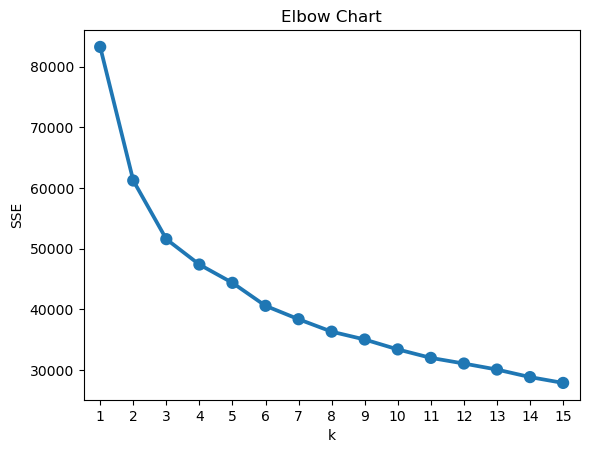

In [16]:
#elbow chart to determine 'k' value (num. of clusters)
%matplotlib inline
sse = {}
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=654)  #initialize kmeans model with 'k' clusters
    kmeans.fit(fam_norm)  #fit model to normalized data
    sse[k] = kmeans.inertia_ 

#elbow chart
plt.title('Elbow Chart')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

Based on the elbow method/chart, it might be wise to use 6 clusters - as the line seems to "hinge"/"elbow" at k=6. However, it is important to note that there is no "right" number of clusters to use and the elbow method is only used as a guide to inform this decision (i.e., in conjunction with the business needs/objectives of management).

#### Building K-Means Model

In [17]:
#placing visitors into 6 groups
model = KMeans(n_clusters = 6, random_state=654) #build model with 'k' clusters
model.fit(fam_norm) #fit k-means model to normalized data
labels = model.predict(fam_norm) 
fam_norm2= fam_norm.assign(Cluster= labels) #assign cluster labels to standardized df
family2= family.assign(Cluster= labels) #assign cluster labels to original df

In [18]:
#showing cluster labels assigned by model (i.e., 'Cluster' column)
family2.head()

,hhold_ID,est_net_worth,est_inc,domestic,number_visits,number_children,oldest_child_age,dis_plus_sub,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO,Cluster
0,1,7525,7825,1,0,2,9.0,0,826.0,2309.0,4094.0,701,5
1,2,639815,449775,1,1,2,11.0,0,1779.0,9060.0,8670.0,764,0
2,3,288847,204750,1,6,3,13.0,1,2121.0,6436.0,5021.0,720,0
3,4,191791,136730,1,1,1,8.0,1,1880.0,13107.0,66074.0,783,3
4,5,96527,72165,0,3,0,12.0,0,775.0,2042.0,2846.0,757,2


#### Summary Stats

In [19]:
#summary stats for each cluster 
grouped = family2.groupby(['Cluster'])
grouped.describe().round(2)

hhold_ID                                                            \
           count     mean      std   min      25%     50%      75%     max   
Cluster                                                                      
0         3057.0  4572.87  2699.94   2.0  2206.00  4513.0  6899.00  9250.0   
1          372.0  4816.22  2636.18  20.0  2588.75  4997.0  7036.00  9247.0   
2         2398.0  4627.54  2633.03   5.0  2387.00  4618.5  6905.75  9249.0   
3          985.0  4557.47  2643.65   4.0  2325.00  4518.0  6824.00  9237.0   
4          380.0  4716.92  2643.65  42.0  2284.50  4945.5  6941.75  9228.0   
5         2058.0  4682.51  2693.06   1.0  2315.25  4749.5  7044.75  9240.0   

        est_net_worth              ... est_annual_leisure           \
                count        mean  ...                75%      max   
Cluster                            ...                               
0              3057.0   588381.67  ...           10189.00  56356.0   
1               372.0  6020044.02  ...           61884.75  74805.0   
2              2398.0    56898.42  ...            2941.00  53766.0   
3               985.0  1821557.02  ...           37883.00  67247.0   
4               380.0   364745.48  ...            7110.00  45601.0   
5              2058.0    61325.55  ...            3187.00  44142.0   

        est_hhold_FICO                                                      
                 count    mean    std    min     25%    50%     75%    max  
Cluster                                                                     
0               3057.0  750.11  24.96  668.0  733.00  750.0  767.00  847.0  
1                372.0  747.38  23.69  674.0  729.00  748.0  763.25  815.0  
2               2398.0  763.52  21.74  699.0  748.00  764.0  778.00  838.0  
3                985.0  750.21  25.24  673.0  733.00  750.0  768.00  841.0  
4                380.0  752.40  24.25  685.0  737.00  751.0  769.00  828.0  
5               2058.0  735.25  21.47  655.0  720.25  736.0  750.00  798.0  

[6 rows x 96 columns]

In [20]:
#average, median, & count by cluster
grouped.agg({'est_net_worth': ['mean', 'median'], 'est_inc': ['mean', 'median'],  
             'number_visits': ['mean', 'median'], 'number_children': ['mean', 'median'], 
             'oldest_child_age': ['mean', 'median'], 'online_merch_avg': ['mean', 'median'],
             'est_annual_travel': ['mean', 'median'],'est_annual_leisure': ['mean', 'median'], 
             'est_hhold_FICO': ['mean', 'median', 'count']}).round(2)

est_net_worth                est_inc            number_visits         \
                 mean     median        mean     median          mean median   
Cluster                                                                        
0           588381.67   466414.0   487670.81   329380.0          2.11    2.0   
1          6020044.02  5721637.0  3568802.52  3536832.5          2.73    1.0   
2            56898.42    43243.0    42883.58    33232.5          2.14    2.0   
3          1821557.02  1821389.0  1289318.53  1278440.0          2.40    2.0   
4           364745.48   136702.0   305458.61   100632.5         13.98   12.0   
5            61325.55    45551.0    45954.21    35157.5          2.15    1.5   

        number_children        oldest_child_age        online_merch_avg  \
                   mean median             mean median             mean   
Cluster                                                                   
0                  2.23    2.0            12.03   12.0          1839.08   
1                  2.16    2.0            12.19   12.0          1844.60   
2                  1.82    2.0            12.80   13.0           799.28   
3                  2.25    2.0            11.85   12.0          1840.54   
4                  2.01    2.0            12.17   12.0          1325.25   
5                  2.73    3.0            10.95   11.0           829.11   

                est_annual_travel          est_annual_leisure           \
         median              mean   median               mean   median   
Cluster                                                                  
0        1802.0           7893.73   6868.0            7560.13   6194.0   
1        1806.0          19788.67  22603.0           43335.41  38666.5   
2         783.0           2694.72   1917.0            2555.12   1891.0   
3        1802.0          30435.94  28532.0           29966.14  27115.0   
4        1024.5           6168.07   4169.5            5863.48   3551.0   
5         789.0           2856.81   2045.0            2688.86   2001.5   

        est_hhold_FICO               
                  mean median count  
Cluster                              
0               750.11  750.0  3057  
1               747.38  748.0   372  
2               763.52  764.0  2398  
3               750.21  750.0   985  
4               752.40  751.0   380  
5               735.25  736.0  2058

In [21]:
#average/count by cluster (z-scores)
grouped_norm = fam_norm2.groupby(['Cluster'])
grouped_norm_stats= grouped_norm.agg({'est_net_worth': 'mean', 'est_inc': 'mean',  
             'number_visits': 'mean', 'number_children': 'mean', 
             'oldest_child_age': 'mean', 'online_merch_avg': 'mean',
             'est_annual_travel': 'mean','est_annual_leisure': 'mean', 
             'est_hhold_FICO': 'mean'}).round(2)
grouped_norm_stats

,est_net_worth,est_inc,number_visits,number_children,oldest_child_age,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO
Cluster,,,,,,,,,
0,-0.06,0.01,-0.17,0.00,0.02,0.96,-0.03,-0.10,-0.01
1,4.00,3.53,0.02,-0.06,0.11,0.97,1.12,2.63,-0.11
2,-0.46,-0.49,-0.16,-0.36,0.42,-0.98,-0.54,-0.49,0.52
3,0.86,0.93,-0.08,0.03,-0.07,0.96,2.16,1.61,-0.00
4,-0.23,-0.19,3.43,-0.19,0.10,0.00,-0.20,-0.23,0.08
5,-0.46,-0.49,-0.16,0.45,-0.53,-0.92,-0.52,-0.48,-0.59


#### Visualizing Cluster Models

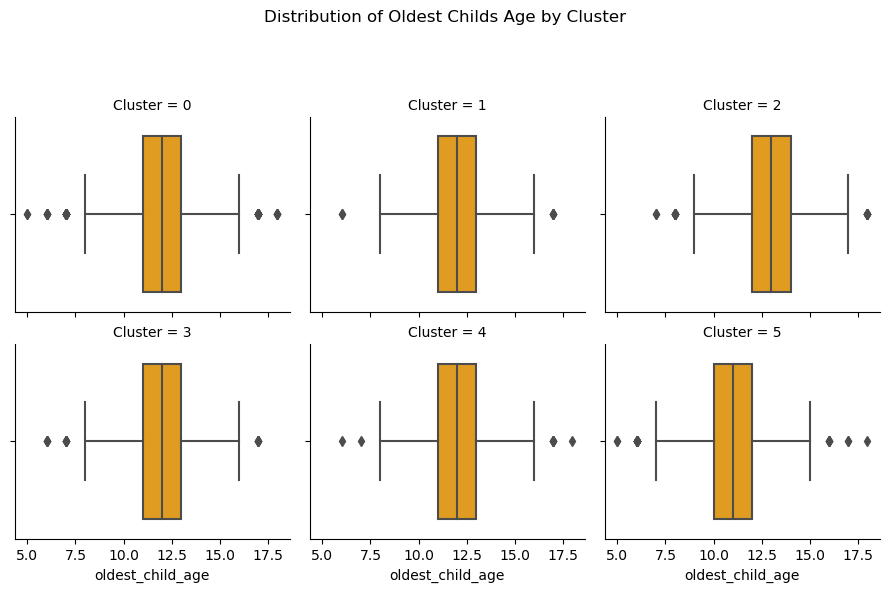

In [22]:
a= sns.FacetGrid(family2, col= 'Cluster', col_wrap= 3, margin_titles= True)
a.map(sns.boxplot, 'oldest_child_age', order= 'Cluster', color= 'orange')
a.fig.suptitle('Distribution of Oldest Childs Age by Cluster')
a.fig.subplots_adjust(top=.8)  #adjust title positioning

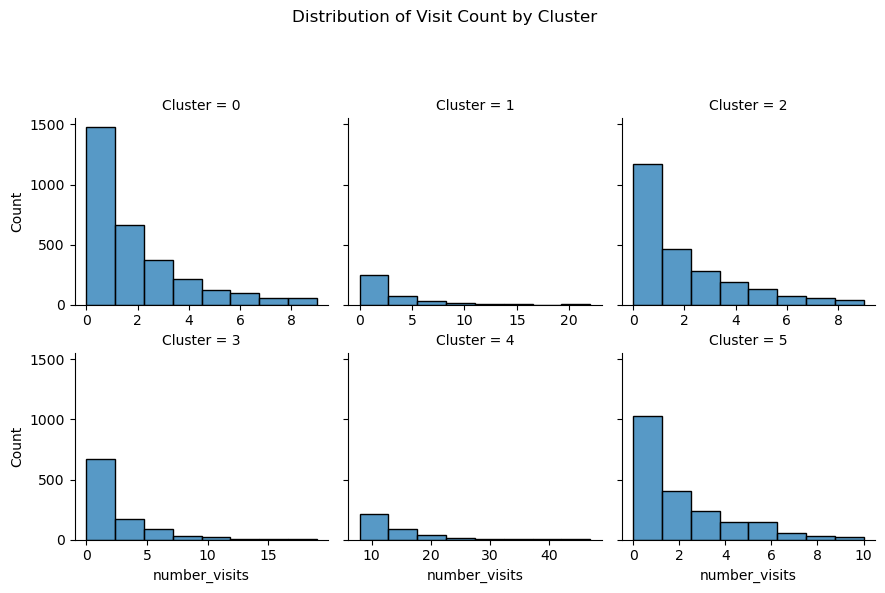

In [23]:
b= sns.FacetGrid(family2, col= 'Cluster', margin_titles= True, col_wrap= 3, sharex= False)
b.map(sns.histplot, 'number_visits', bins= 8)
b.fig.suptitle('Distribution of Visit Count by Cluster')  #add title
b.fig.subplots_adjust(top=.8) #adjust title positioning

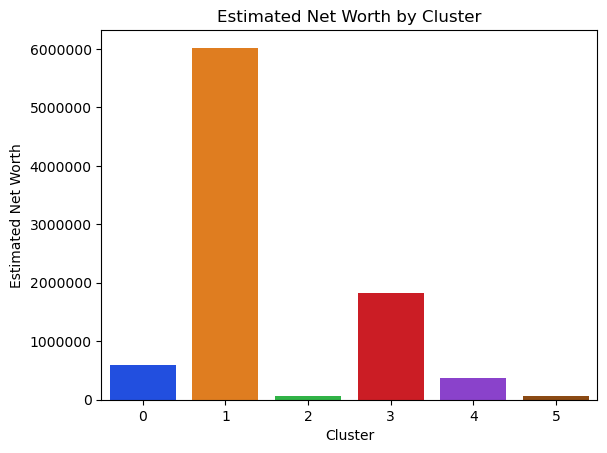

In [24]:
c= sns.barplot(data= family2, x= 'Cluster', y= 'est_net_worth',
              palette= 'bright', ci= None)
c.set(title= 'Estimated Net Worth by Cluster', ylabel= 'Estimated Net Worth')
plt.ticklabel_format(style='plain', axis='y')

(6.5, -0.5)

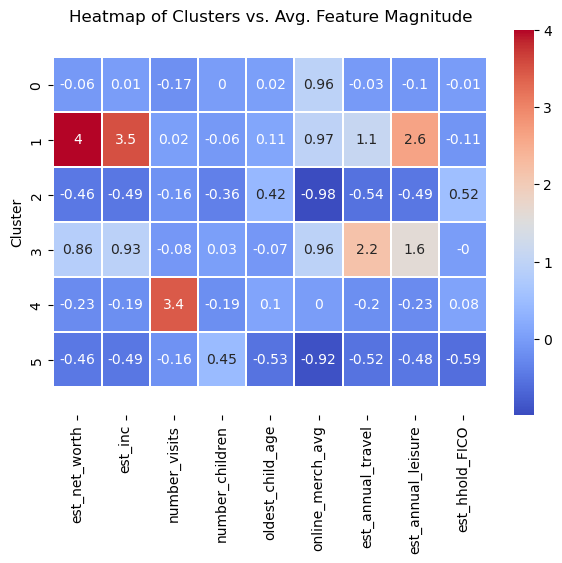

In [25]:
%matplotlib inline
plt.subplots(figsize=(7,5))
d= sns.heatmap(data= grouped_norm_stats, annot= True, cmap= 'coolwarm', linewidths= 0.05)
d.set(title= 'Heatmap of Clusters vs. Avg. Feature Magnitude') 
b,t = plt.ylim()
b += 0.5 #Add 0.5 to the bottom
t -= 0.5 #Subtract 0.5 from the top
plt.ylim(b,t) #update the ylim(bottom, top) values

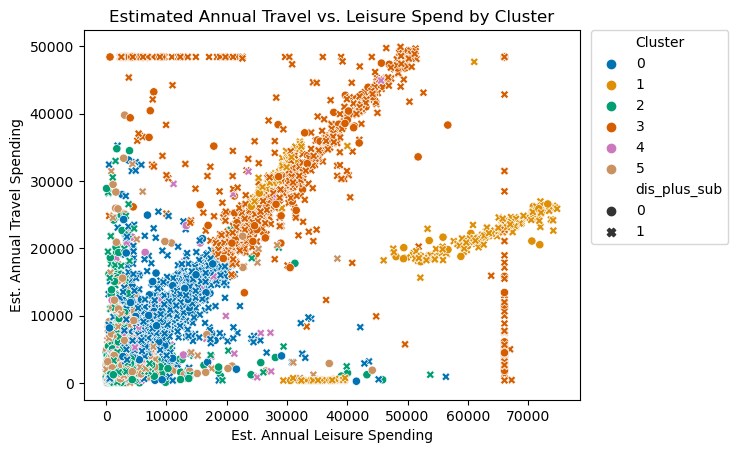

In [26]:
e= sns.scatterplot(x= 'est_annual_leisure', y= 'est_annual_travel', style= 'dis_plus_sub', 
                   hue= 'Cluster', palette= 'colorblind', data= family2)
e.set(title= 'Estimated Annual Travel vs. Leisure Spend by Cluster', 
      xlabel= 'Est. Annual Leisure Spending', ylabel= 'Est. Annual Travel Spending')
plt.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0)

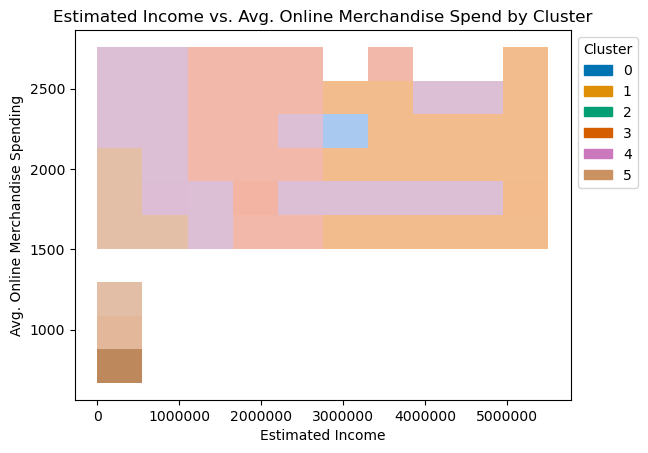

In [27]:
f= sns.histplot(data= family2, x= 'est_inc', y= 'online_merch_avg', bins=10, 
              hue= 'Cluster', palette= 'colorblind')
f.set(title= 'Estimated Income vs. Avg. Online Merchandise Spend by Cluster',
     xlabel= 'Estimated Income', ylabel= 'Avg. Online Merchandise Spending')
plt.ticklabel_format(style='plain', axis='x')
sns.move_legend(f, "upper left", bbox_to_anchor=(1, 1))

#### Cluster Names/Descriptions + Targeting

Cluster 0: "The Lost Boys of Neverland" - This group of families has the lowest average number of visits to Disney -- compared to the other clusters, these families visit the parks at a low frequency or they have never visisted. Based on the bar chart for this cluster, one can conclude that the majority of these families have "never" visited a Disney park/resort. Disney might consider these families to be 'lost' in "Neverland" (i.e., a reference to the Disney film, "Peter Pan"). While this cluster tends to visit Disney the least on average, these families spend almost as much on online merchandise on average as the Aristocats & Disney Dreamers (i.e., the 2 highest spending clusters). Therefore, Disney might target this group with digital ads on streaming platform such as Disney+ or on the Disney website. Such an ad might highlight the most frequented attractions by first time/newer visitors.

Cluster 1: "Aristocats" - Similar to aristocrats, these groups of families have much higher average estimated net worths & average estimated net incomes than all of the other clusters. Likewise, these families have the highest average FICO (credit) score and spend the more than any other group on online merchandise & annual leisure fees, on average. The name of this cluster was inspired by the wealthy status/upper-class lifestyle of aristocrats and is a nod to the classic Disney film, "The Aristocats." Considering both the strong financial standing of this group and their tendency to spend the most on annual leiure expenditures in comparison to the other clusters, Disney might target this group of customers with any luxury attractions/resorts. For example, sending these customers email promotions for Disney's resort in Hawaii (e.g., maybe these promotions feature the resorts' pool, spa, or a relaxing game of golf).

Cluster 2: "Honey I Shrunk the Kids" - These families have the lowest average estimated net worth & estimated income; spending less than those in any other cluster on online merchandise, annual travel fees, & annual leisure fees, on average. When compared to the other clusters, these families tend to have less children and the average oldest child in these families tends to be older than the oldest children of families in the other 5 clusters. We labeled this cluster "Honey I Shrunk the Kids", which is an older Disney movie that might appeal to families with older kids (e.g., live-action rather than animated) or bring a sense of nostalgia to teens/adults. Given the tendency for the oldest children in these families to be older and the smaller amount of children on average, Disney could target these families with nostalgic rides/attractions (e.g., like the Honey I Shrunk the Kids that was previously in DisneyWorld). Further, maybe Disney hosts a special 12+ event for families with older children to explore the park/these new nostalgic attractions.

Cluster 3: "Planes" - This cluster has the greatest average estimated annual travel spending, as well as an average estimated net worth & estimated income greater than most of the other clusters (i.e., with the exception of  "Aristocats", or cluster 1). The name of this cluster is based on the Disney movie "Planes," where the main character exerts a lot of fuel in preparation for a race where he will travel around the world - much like the families in this cluster, who seem to shell out a considerable amount of capital on traveling expenditures. Taking into consideration the financial standings of this cluster, (i.e., 2nd highest est. net worth & est. income, highest est. annual lesiure spend) Disney may target this group with Disney-branded credit cards to earn points on as they spend. For example, for any travel expenditures, families can earn 2x the points, while in any Disney stores, parks, websites, or streaming platforms for 5x the points.

Cluster 4: "Disney Dreamers" - On average, this segment of families tends to visit Disney with a greater frequency than the other clusters. Because Disney is known as "the place that dreams come true," we will refer to these families as "Disney Dreamers." These families visit Disney with the greatest frequency but have relatively low est. net worths/est. income & do not spend a lot on annual travel/leisure expenditures on average. Given the low travel spend, it is reasonable to assume a majority of these families are local (i.e., do not spend a lot on lodging/transportation). Thus, Disney might target these families with seasonal parking passes that may be used in any of the parks; everyday a family uses the parking pass, they receive 5-10% off ticket prices. 

Cluster 5: "Cheaper by the Dozen" - This group of families has the lowest average estimated household FICO (credit) score, the greatest number of kids on average, and the average age of the oldest child in these families tends to be much lower (e.g., more families with younger children/younger children only). Also, these families have lower average estimated net worth & estimated income than most of the other clusters (i.e., with the exception of "Honey I Shrunk the Kids", or cluster 2). The name of this cluster emphasizes the tendency for these families to have a greater number of kids and poor financial standings (i.e., in comparison to the other clusters); and is inspired by the Disney film, "Cheaper by the Dozen" -- which follows a family with a dozen children (i.e., much more than average, like in this cluster). Given the poor financial standing of these families in comparison to the other clusters, in addition to the larger sizes of these families on average (e.g., more kids), Disney might target "Cheaper by the Dozen" with coupons to the parks or promotional discouns (e.g., buy one, get one free kids tickets).

## **Conjoint Analysis**

In [28]:
# Load amenity cost data
cost = pd.read_csv('amenity_costs.csv') 
cost  # view amenity cost data

,Amenity,Level,"Estimated Incremental Cost,\nPer Visitor/Per Night"
0,WiFi_Network,Basic,11.75
1,WiFi_Network,Strong,16.25
2,WiFi_Network,Best in Class,19.15
3,breakfast,None,0.00
4,breakfast,Continental,13.25
5,breakfast,Full Buffet,22.45
6,parking,Valet,60.00
7,parking,Open Lot,15.00
8,gym,None,0.00
9,gym,Basic,10.00


In [29]:
# Load hotel amenity data
hotel = pd.read_csv('hotel_amenities.csv')
hotel.info()  # get data types & missing value count for hotel amenity data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6912 entries, 0 to 6911
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WiFi_Network  6912 non-null   object 
 1   breakfast     6912 non-null   object 
 2   parking       6912 non-null   object 
 3   gym           6912 non-null   object 
 4   flex_check    6912 non-null   object 
 5   shuttle_bus   6912 non-null   object 
 6   air_pure      6912 non-null   object 
 7   jacuzzi       6912 non-null   object 
 8   VIP_shop      6912 non-null   object 
 9   pool_temp     6912 non-null   int64  
 10  avg_rating    6912 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 594.1+ KB


In [30]:
# Get dimensions of hotel amenity dataframe
hotel.shape 

(6912, 11)

In [31]:
# Check for missing values
hotel.isnull().sum()

WiFi_Network    0
breakfast       0
parking         0
gym             0
flex_check      0
shuttle_bus     0
air_pure        0
jacuzzi         0
VIP_shop        0
pool_temp       0
avg_rating      0
dtype: int64

In [32]:
hotel.head() # view first few rows

,WiFi_Network,breakfast,parking,gym,flex_check,shuttle_bus,air_pure,jacuzzi,VIP_shop,pool_temp,avg_rating
0,Basic,None,Valet,None,No,No,No,No,No,76,4.57
1,Basic,None,Valet,None,No,No,No,No,No,80,7.60
2,Basic,None,Valet,None,No,No,No,No,No,84,5.66
3,Basic,None,Valet,None,No,No,No,No,Yes,76,2.80
4,Basic,None,Valet,None,No,No,No,No,Yes,80,4.56


In [33]:
hotel.tail() # view last few rows

,WiFi_Network,breakfast,parking,gym,flex_check,shuttle_bus,air_pure,jacuzzi,VIP_shop,pool_temp,avg_rating
6907,Best in Class,Full Buffet,Open Lot,Super,Yes,Yes,Yes,Yes,No,80,8.21
6908,Best in Class,Full Buffet,Open Lot,Super,Yes,Yes,Yes,Yes,No,84,8.21
6909,Best in Class,Full Buffet,Open Lot,Super,Yes,Yes,Yes,Yes,Yes,76,8.21
6910,Best in Class,Full Buffet,Open Lot,Super,Yes,Yes,Yes,Yes,Yes,80,8.21
6911,Best in Class,Full Buffet,Open Lot,Super,Yes,Yes,Yes,Yes,Yes,84,8.21


In [34]:
# List columns in hotel amenity dataframe
hotel.columns

Index(['WiFi_Network', 'breakfast', 'parking', 'gym', 'flex_check',
       'shuttle_bus', 'air_pure', 'jacuzzi', 'VIP_shop', 'pool_temp',
       'avg_rating'],
      dtype='object')

In [35]:
# Get unique value counts for all variables in hotel amenity dataframe
hotel.nunique(axis=0)

WiFi_Network      3
breakfast         3
parking           2
gym               4
flex_check        2
shuttle_bus       2
air_pure          2
jacuzzi           2
VIP_shop          2
pool_temp         3
avg_rating      742
dtype: int64

In [36]:
# Get summary stats for hotel amenity dataframe
hotel.describe()

,pool_temp,avg_rating
count,6912.000000,6912.000000
mean,80.000000,7.370858
std,3.266223,1.656300
min,76.000000,2.130000
25%,76.000000,6.347500
50%,80.000000,7.970000
75%,84.000000,8.280000
max,84.000000,10.000000


In [37]:
# Print unique values for all variables with unique value counts > 2
print(hotel['WiFi_Network'].unique())
print(hotel['breakfast'].unique())
print(hotel['parking'].unique())
print(hotel['gym'].unique())
print(hotel['pool_temp'].unique())

['Basic' 'Strong' 'Best in Class']
['None' 'Continental' 'Full Buffet']
['Valet' 'Open Lot']
['None' 'Basic' 'Advanced' 'Super']
[76 80 84]


In [38]:
# Get dummy variables for categorical variables
hotel2 = pd.get_dummies(hotel, columns=['WiFi_Network', 'breakfast', 'parking', 'gym', 'flex_check',
       'shuttle_bus', 'air_pure', 'jacuzzi', 'VIP_shop', 'pool_temp'], drop_first=True)

In [39]:
# Dropped variables for multicollinearity issue wifi=basic, breakfast=continental, parking=open lot, gym=advanced, yes/no=no, temp=76
hotel2.head(10) # view first 10 rows of preprocessed data

,avg_rating,WiFi_Network_Best in Class,WiFi_Network_Strong,breakfast_Full Buffet,breakfast_None,parking_Valet,gym_Basic,gym_None,gym_Super,flex_check_Yes,shuttle_bus_Yes,air_pure_Yes,jacuzzi_Yes,VIP_shop_Yes,pool_temp_80,pool_temp_84
0,4.57,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
1,7.60,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0
2,5.66,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1
3,2.80,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
4,4.56,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0
5,5.12,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1
6,2.44,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0
7,2.66,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0
8,4.22,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1
9,7.39,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0


In [40]:
# Get dimensions for preprocessed hotel amenity dataframe
hotel2.shape

(6912, 16)

In [41]:
# Get data types for columns in preprocessed hotel amenity dataframe
hotel2.dtypes

avg_rating                    float64
WiFi_Network_Best in Class      uint8
WiFi_Network_Strong             uint8
breakfast_Full Buffet           uint8
breakfast_None                  uint8
parking_Valet                   uint8
gym_Basic                       uint8
gym_None                        uint8
gym_Super                       uint8
flex_check_Yes                  uint8
shuttle_bus_Yes                 uint8
air_pure_Yes                    uint8
jacuzzi_Yes                     uint8
VIP_shop_Yes                    uint8
pool_temp_80                    uint8
pool_temp_84                    uint8
dtype: object

In [42]:
# Create matrix to denote single input (feature) variable ('x')
X = hotel2[['WiFi_Network_Best in Class', 'WiFi_Network_Strong',
       'breakfast_Full Buffet', 'breakfast_None', 'parking_Valet', 'gym_Basic',
       'gym_None', 'gym_Super', 'flex_check_Yes', 'shuttle_bus_Yes',
       'air_pure_Yes', 'jacuzzi_Yes', 'VIP_shop_Yes', 'pool_temp_80',
       'pool_temp_84']]

# Create target/outcome variable ('y')
y = hotel2['avg_rating']

In [43]:
# Linear Regression model
lm = LinearRegression()  # intialize model
lm.fit(X, y)  # fit model 
lm.intercept_  # return intercept of Linear Regression model

5.527955729166669

In [44]:
# Split the data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=654)

In [45]:
# Fit model to training dataset & get intercept
lm = LinearRegression()  # intialize model
lm.fit(X_train, y_train)
lm.intercept_

5.4754473710162275

In [46]:
# Create dataframe to display coefficients of the model
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coef

,Coefficient
WiFi_Network_Best in Class,1.724893
WiFi_Network_Strong,1.160978
breakfast_Full Buffet,0.543154
breakfast_None,-0.206894
parking_Valet,0.117816
gym_Basic,-0.155026
gym_None,-0.201128
gym_Super,0.030483
flex_check_Yes,0.466714
shuttle_bus_Yes,0.462803


In [47]:
# Combine columns in the cost DataFrame to create 'amenity' column
cost['amenity'] = cost['Amenity'].astype(object) +'_'+ cost['Level']

In [48]:
# Remove unnecessary columns from the amenity costs dataframe
cost = cost.drop(columns=['Amenity', 'Level'])

In [49]:
# Create dataframe of cost values
data2 = [0, 1.160978/16.25, 1.724893/19.15, -0.206894, 0, 0.543154/22.45, 
         0.117816/60, 0, -0.201128, -0.155026/10, 0, 0.030483/65, 0, 0.466714/12,
         0, 0.462803/75, 0, 0.089652/12.85, 0, 0.192366/40, 0, 0.233033/12, 0,
         0.090348/35, 0.271793/45]
cost2 = pd.DataFrame(data2, columns=['cost']) 
cost2 = cost2.astype(float)
cost2 = cost2.round({'cost':4})
cost2.dtypes

cost    float64
dtype: object

In [50]:
# Add the 'cost' column to the amenity cost dataframe
cost['rating_change_per_dollar'] = cost2['cost']
cost # return dataframe

,"Estimated Incremental Cost,\nPer Visitor/Per Night",amenity,rating_change_per_dollar
0,11.75,WiFi_Network_Basic,0.0000
1,16.25,WiFi_Network_Strong,0.0714
2,19.15,WiFi_Network_Best in Class,0.0901
3,0.00,breakfast_None,-0.2069
4,13.25,breakfast_Continental,0.0000
5,22.45,breakfast_Full Buffet,0.0242
6,60.00,parking_Valet,0.0020
7,15.00,parking_Open Lot,0.0000
8,0.00,gym_None,-0.2011
9,10.00,gym_Basic,-0.0155


In [51]:
# Sort the cost DataFrame by the 'rating_change_per_dollar' column in descending order
cost.sort_values(['rating_change_per_dollar'], ascending=False)

,"Estimated Incremental Cost,\nPer Visitor/Per Night",amenity,rating_change_per_dollar
2,19.15,WiFi_Network_Best in Class,0.0901
1,16.25,WiFi_Network_Strong,0.0714
13,12.00,flex_check_Yes,0.0389
5,22.45,breakfast_Full Buffet,0.0242
21,12.00,VIP_shop_Yes,0.0194
17,12.85,air_pure_Yes,0.0070
15,75.00,shuttle_bus_Yes,0.0062
24,45.00,pool temp_84,0.0060
19,40.00,jacuzzi_Yes,0.0048
23,35.00,pool temp_80,0.0026


In [52]:
# Create list of recommendation data
data3 = [['Wi-Fi = Best in Class', '$19.15', '1.724893'],
        ['Breakfast = Full Buffet', '$22.45', '0.543154'],
        ['Parking = Open Lot', '$15', '0'],
        ['Gym = Advanced', '$35', '0'],
        ['Flex Check = Yes', '$12', '0.089652'],
        ['Shuttle Bus = Yes', '$75', '0.462803'],
        ['Air Pure = Yes', '$12.85', '0.089652'],
        ['Jacuzzi = No', '$0', '0'],
        ['VIP Shop = Yes', '$12', '0.233033'],
        ['Pool Temp = 84', '$45', '0.271793']]

# Create/return dataframe for recommendations 
rec = pd.DataFrame(data3, columns=['Amenities', 'Cost', 'Rating addition'])
rec

,Amenities,Cost,Rating addition
0,Wi-Fi = Best in Class,$19.15,1.724893
1,Breakfast = Full Buffet,$22.45,0.543154
2,Parking = Open Lot,$15,0
3,Gym = Advanced,$35,0
4,Flex Check = Yes,$12,0.089652
5,Shuttle Bus = Yes,$75,0.462803
6,Air Pure = Yes,$12.85,0.089652
7,Jacuzzi = No,$0,0
8,VIP Shop = Yes,$12,0.233033
9,Pool Temp = 84,$45,0.271793


The recommendations for Disney's new hotel in Hawaii have been formulated through a comprehensive analysis of customer survey responses and their correlation with the associated costs of each amenity. Employing a Linear Regression model for conjoint analysis, the objective was to ascertain how modifications in amenities impact the average customer rating. This was achieved by generating dummy variables to represent various amenity selections and assessing their influence on customer ratings. It's crucial to consider all ten amenities in each evaluation.

The baseline `lm.intercept_` value of 5.48 corresponds to the average rating when the excluded dummy variables are set to 1. This scenario assumes basic Wi-Fi, continental breakfast, open lot parking, advanced gym facilities, no flex check, no shuttle service, no air purifier, no jacuzzi, no VIP shop, and a pool temperature of 76 degrees. The total cost for these amenities is $75. Notably, changes in Wi-Fi, breakfast, parking, and gym amenities must factor in the associated cost differences. The Coefficient table showcases the rating adjustments from the intercept due to changes in specific amenities. For instance, upgrading Wi-Fi to 'Best in Class' increases the rating by 1.72, but incurs an additional cost of $7.40 (difference between $19.15 and $11.75). This principle holds true for all coefficients.

For a more insightful perspective on cost-efficiency, the 'rating_change_per_dollar' table is presented. This metric divides the rating change coefficients by the total cost, quantifying the impact of a $1 investment on ratings. By sorting this table, the top amenities can be identified within budget constraints.

The recommended amenity package, costs, and resulting rating adjustments are outlined below:

Total Amenity Cost: $248.45 per room, per night.

With this amenity arrangement, the projected average customer rating is 8.89, which is the `lm.intercept_` plus the sum of all rating additions.

Several assumptions guided our selections. Considering the significance of technology in modern travel experiences, high-quality Wi-Fi is expected to enhance customer satisfaction. Additionally, offering a full buffet breakfast simplifies meal planning for vacationers, making it a valuable amenity. Open lot parking suffices as guests are likely to use ride-sharing services. The recommendation for a shuttle service is budget-friendly and enhances convenience compared to valet parking. Surprisingly, guests still value a well-equipped gym while on vacation. Both Flex Check and Shuttle Bus options positively impact customer experience and cost-effectiveness. Air purifiers have gained importance due to the pandemic, contributing to customer satisfaction. Although Jacuzzis are enjoyable, their cost does not justify the minimal impact on ratings. Elevating the pool temperature to 84 degrees appeals to guests, and with funds available, this enhancement is viable. Finally, the VIP shop is recommended for souvenir shopping, aligning with guest preferences.

In summary, the recommended amenities, their associated costs, and their effect on ratings are substantiated by a thorough conjoint analysis. This strategy aims to optimize customer satisfaction while staying within a $250 cost threshold per room, per night.

## **Strategic Memo**

**Introduction and Background:**
In this portion of the Marketing Analytics project for Disney, the focus is on analyzing the strategic decisions faced by The Walt Disney Company within the context of its theme parks division. The case study titled "The Walt Disney Company: Theme Parks" has served as the basis for our analysis. This case presents Disney with critical decisions to make regarding the potential launch and scaling of DisneyQuest, the construction of a standalone Hawaiian hotel, and an investment in the technological upgrade of their existing theme parks. As a closed universe analysis, this portion of the project draws solely from the information and insights provided within the case, without utilizing any external research.

**Purpose and Scope of the Strategic Memo:**
The purpose of this strategic memo is to provide Disney with actionable recommendations based on the analysis of the aforementioned strategic decisions. It takes into account the challenges posed by competitors, such as Universal's significant growth over the past years. The recommendations aim to support Disney in improving visitor experiences, fostering innovation, and maintaining its core values while addressing the choices at hand.

**Current Challenges and Decision Points:**
Disney faces the challenge of sustaining its appeal to a new generation of vacationers while preserving the essence of the classic Disney experience. The company must decide whether to invest in advanced technology through a park-wide upgrade, introduce a standalone Hawaiian hotel, or venture into the themed indoor recreation space with DisneyQuest. Each option offers unique potential benefits and challenges.

**Strategic Memo**

> Subject: Strategic Recommendations for Disney's Theme Parks Future

> Dear Disney Leadership,

> After careful consideration of the challenges and opportunities outlined in the case "The Walt Disney Company: Theme Parks," we recommend a strategic path that aligns with Disney's commitment to innovation, guest experiences, and long-term value creation. Our analysis points to the significant potential of investing in a technological upgrade of the current theme parks, specifically through the implementation of RFID-enabled Magic Bands.

> **1. Technological Overhaul for Immersive Guest Experiences:**
Opting for a comprehensive technological upgrade offers a promising avenue to usher in a new era of Disney vacationing. The introduction of RFID-enabled Magic Bands presents the opportunity to seamlessly integrate digital experiences into the physical realm of the parks. These bands would allow guests to engage with attractions, make transactions, and access personalized content effortlessly, enhancing the overall guest experience.

> **2. Synergy and Data Integration:**
One of the major benefits of this approach is the creation of a cohesive digital infrastructure that bridges the company's theme parks, attractions, dining establishments, and hotels. The interconnectedness of these elements not only streamlines operations but also provides a wealth of data for analysis. By harnessing this data, Disney can gain valuable insights into guest preferences, behavior patterns, and trends, enabling the company to tailor its offerings to individual visitors.

> **3. Personalization and Enhanced Engagement:**
The data collected through Magic Bands enables a new level of guest personalization. The analysis of guests' activity history could inform tailored suggestions, recommendations, and even custom experiences during their stay. This level of personalization not only deepens guest engagement but also generates additional revenue opportunities through curated offerings.

> **4. Operational Efficiency and Cost Reduction:**
The digital transformation brought about by Magic Bands can drive operational efficiency, optimizing resource allocation, staff deployment, and inventory management. Reduced reliance on traditional payment methods and paper-based systems could lead to cost savings while also contributing to a more sustainable and environmentally conscious operation.

> **5. Maintaining the Core Disney Experience:**
While technological innovation is embraced, it is crucial to ensure that the essence of the Disney experience remains intact. The digital enhancements should augment, not replace, the core values that Disney has upheld throughout its history.

> In conclusion, after a thorough analysis of the case's context, options, and implications, we firmly recommend pursuing the technological overhaul of the current theme parks through the implementation of RFID-enabled Magic Bands. This strategic decision capitalizes on the potential for guest engagement, operational efficiency, data-driven insights, and long-term value creation, all while remaining true to Disney's core identity.
We are confident that this path forward will not only address the challenges posed by competitors but also position Disney as an industry leader in innovation, guest experiences, and sustainable growth.

## **Forecasting Net Income**

In [53]:
# Load data & set 'Year' as index
DIS = pd.read_csv('DIS_2010_2023_NET_INCOME.csv', index_col = 'Year', parse_dates = True)

In [54]:
DIS.head() # get first few rows of data

,Quarter,Net_Income_Millions
Year,,
2010-03-31,1,844
2010-06-30,2,953
2010-09-30,3,"1,331"
2010-12-31,4,835
2011-03-31,1,"1,302"


In [55]:
DIS.tail() # get last few rows of data

,Quarter,Net_Income_Millions
Year,,
2022-03-31,1,"1,152"
2022-06-30,2,470
2022-09-30,3,"1,409"
2022-12-31,4,162
2023-03-31,1,"1,135"


<AxesSubplot:>

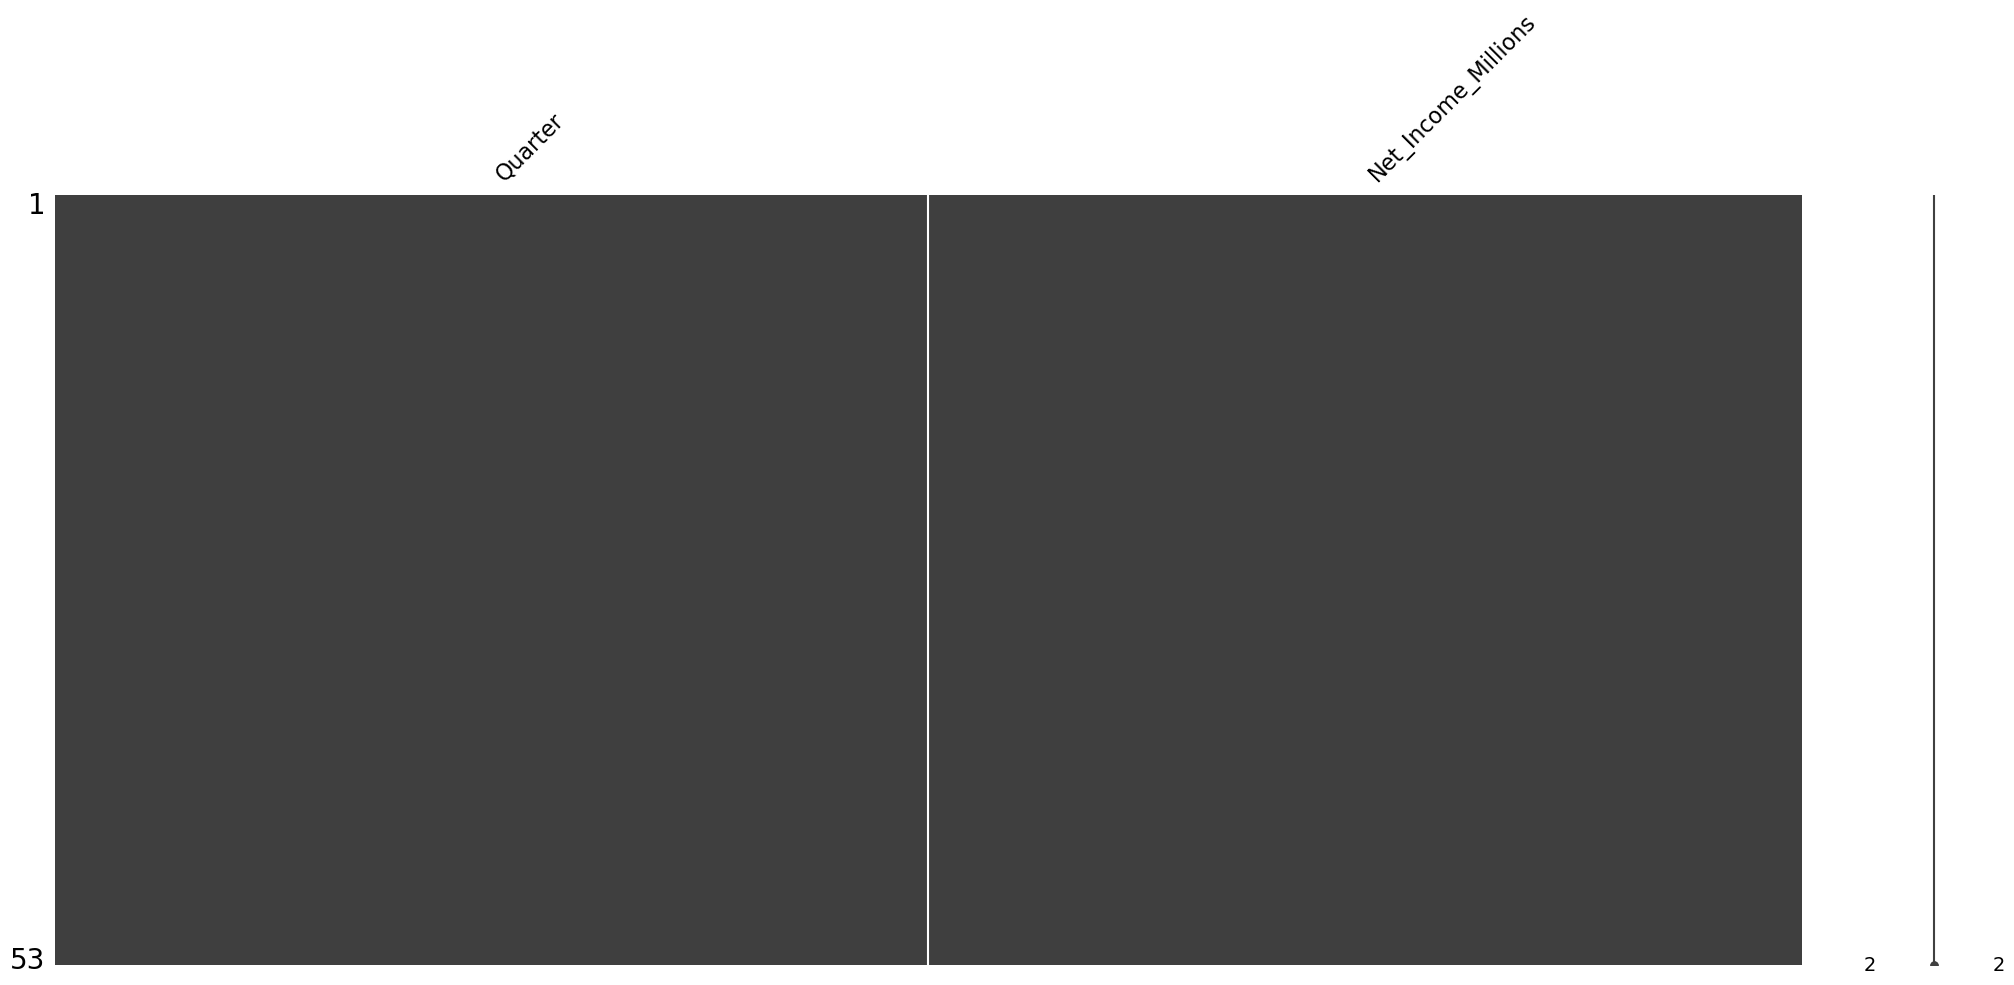

In [56]:
# Visualize missing data 
msno.matrix(DIS)

In [57]:
# Get data types & missing value count for dataset
DIS.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2010-03-31 to 2023-03-31
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Quarter              53 non-null     int64 
 1   Net_Income_Millions  53 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [58]:
# Remove data for 2023 - this is the date we want a forecast for
DIS = DIS[DIS.index != '2023-03-31']

In [59]:
# Drop unnecessary 'Quarter' column
DIS = DIS.drop(['Quarter'], axis = 1)

In [60]:
DIS = DIS.rename(columns={'Net_Income_Millions' : 'net_inc'})

In [61]:
# Check data types of columns in dataset
DIS.dtypes

net_inc    object
dtype: object

In [62]:
# Remove commas from 'net_inc' & convert to float
DIS['net_inc'] = DIS['net_inc'].str.replace(',','')
DIS = DIS.astype({'net_inc': float})

In [63]:
# Confirm float conversion
DIS.dtypes

net_inc    float64
dtype: object

<AxesSubplot:xlabel='Year'>

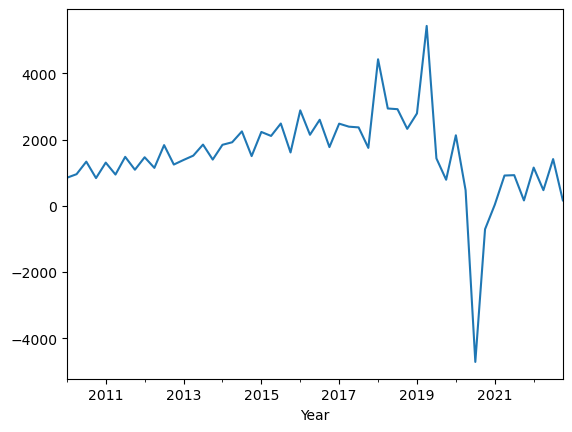

In [64]:
# Plot 'net_inc' column
DIS['net_inc'].plot()

<AxesSubplot:xlabel='Year'>

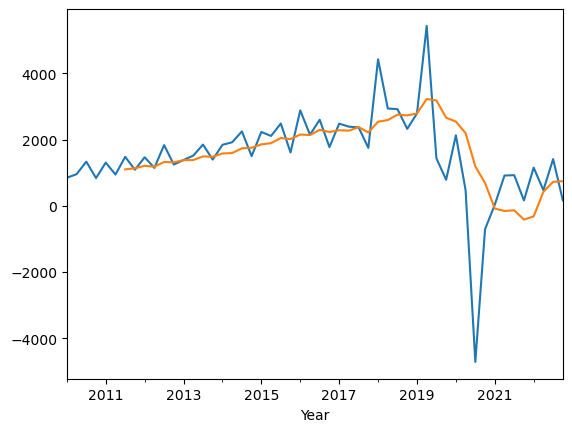

In [65]:
# Plot 'net_inc' column with rolling 7-quarter average
DIS['net_inc'].plot()
DIS.rolling(window=7).mean()['net_inc'].plot()

In [66]:
# Drop rows with missing values
DIS.dropna(inplace = True)

In [67]:
DIS.tail()

,net_inc
Year,
2021-12-31,160.0
2022-03-31,1152.0
2022-06-30,470.0
2022-09-30,1409.0
2022-12-31,162.0


In [68]:
# Define list of dates to forecast (Q1-4 of 2023)
data = ['2023-3-31', '2023-6-30', '2023-9-30', '2023-12-31']

In [69]:
# Define DataFrame to store forecasts
FCS = pd.DataFrame(index= data, columns=['net_inc'])
FCS['net_inc']= FCS['net_inc'].astype('float')
FCS['net_inc']= FCS['net_inc'].fillna(0)

In [70]:
# Check data types of new DataFrame object
FCS.dtypes

net_inc    float64
dtype: object

In [71]:
FCS.tail()

,net_inc
2023-3-31,0.0
2023-6-30,0.0
2023-9-30,0.0
2023-12-31,0.0


In [72]:
# Concatenate original data & forecast data
DIS = pd.concat([DIS, FCS])

# Convert index to datetime
DIS.index = pd.to_datetime(DIS.index)

In [73]:
DIS.tail()

,net_inc
2022-12-31,162.0
2023-03-31,0.0
2023-06-30,0.0
2023-09-30,0.0
2023-12-31,0.0


In [74]:
DIS.head()

,net_inc
2010-03-31,844.0
2010-06-30,953.0
2010-09-30,1331.0
2010-12-31,835.0
2011-03-31,1302.0


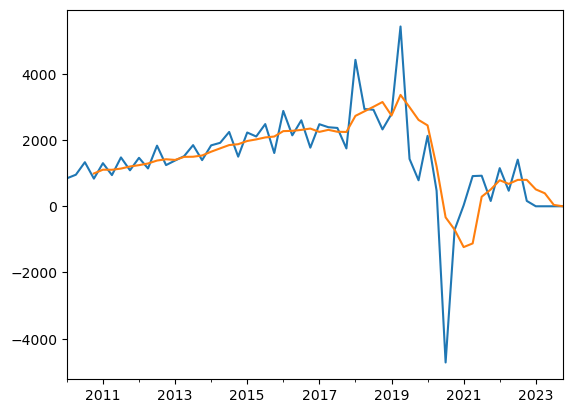

In [75]:
# Plot 'net_inc' & rolling 4-quarter average
DIS['net_inc'].plot()
DIS.rolling(window=4).mean()['net_inc'].plot()
pd.set_option('display.max_columns', None)

In [76]:
# Compute the 4-quarter Simple Moving Average (SMA4)
DIS['SMA4'] = DIS['net_inc'].rolling(4).mean()

In [77]:
# Display the updated DataFrame with 4-quarter SMA
DIS

,net_inc,SMA4
2010-03-31,844.0,NaN
2010-06-30,953.0,NaN
2010-09-30,1331.0,NaN
2010-12-31,835.0,990.75
2011-03-31,1302.0,1105.25
2011-06-30,942.0,1102.50
2011-09-30,1476.0,1138.75
2011-12-31,1087.0,1201.75
2012-03-31,1464.0,1242.25
2012-06-30,1143.0,1292.50


The process of forecasting Disney's 2023 net income involves several key steps. Firstly, historical net income data from Disney's annual reports is read from a CSV file, and missing data is visualized to ensure data quality. Next, unnecessary columns and rows are removed, and data types are adjusted for analysis. The net income data is plotted to understand its historical trends. To generate the forecast, a rolling 4-quarter average is calculated to smooth out fluctuations and provide a more stable projection.

The results of this analysis offer Disney's management valuable insights for financial planning in 2023. By using a rolling 4-quarter average, they can anticipate the net income trend over the year, identifying potential peaks and troughs in performance. This information aids in budgeting, resource allocation, and decision-making. Additionally, the forecast allows Disney to set realistic financial goals and assess its financial health. 

While this code provides a foundational approach to forecasting Disney's 2023 net income using a simple rolling average method, it's essential to recognize that more advanced forecasting techniques, such as time series models (e.g., ARIMA) or machine learning methods (e.g., LSTM), could offer more accurate predictions. These advanced methods can account for various factors and historical patterns, enabling Disney's management to make more informed decisions regarding their financial outlook. Moreover, it's important to consider external factors such as market conditions, competition, and global events that can impact net income and use this forecast in conjunction with a broader strategic analysis for comprehensive financial planning.

## **Classification**

In [78]:
df = pd.read_csv('cruise_returners.csv') # load dataframe
df.head()  # view first few rows

,hhold_ID,discount_original,coupon_received,cabin_type,est_inc,season_of_year,ticket_spend,cruise_theme,incidental_spending,park_package,embark_port,res_to_port,number_children,oldest_child_age,dis_plus_sub,return_1065
0,3598,1,1,Verandah,19280.985,Winter,2649,prin_fro,2898.754343,1,Vancouver,558,3,6.0,1,0
1,155,1,0,Concierge,825719.960,Spring,2941,Star Wars,2898.754343,1,Port Canaveral,280,3,8.0,1,0
2,353,1,0,Oceanview,3755246.459,Fall,2609,Marvel,11750.829364,1,Port Canaveral,351,3,3.0,1,0
3,1474,1,1,Oceanview,96831.550,Winter,2367,Marvel,13945.343512,1,Copenhagen,314,3,7.0,0,0
4,3272,1,0,Verandah,11027.249,Spring,3021,Marvel,2898.754343,1,Copenhagen,342,4,10.0,1,0


In [79]:
df2 = df.drop(columns = ['hhold_ID']) # remove unnecessary unique ID column

In [80]:
# Get descriptive stats of dataframe
df2.describe()  

,discount_original,coupon_received,est_inc,ticket_spend,incidental_spending,park_package,res_to_port,number_children,oldest_child_age,dis_plus_sub,return_1065
count,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7130.000000,7500.000000,7500.000000
mean,0.390533,0.256400,5.729787e+05,2323.825200,7675.384680,0.367200,72.078800,2.493067,9.911781,0.353333,0.480000
std,0.487902,0.436674,1.429802e+06,568.669114,9739.777368,0.482074,63.223008,1.242480,4.652665,0.478037,0.499633
min,0.000000,0.000000,9.070000e-01,1102.000000,13.665279,0.000000,2.000000,-2.000000,2.000000,0.000000,0.000000
25%,0.000000,0.000000,7.154121e+03,1902.750000,2898.754343,0.000000,33.000000,2.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,4.915491e+04,2319.000000,2902.581003,0.000000,54.000000,3.000000,10.000000,0.000000,0.000000
75%,1.000000,1.000000,3.316374e+05,2733.000000,9515.030992,1.000000,89.000000,3.000000,14.000000,1.000000,1.000000
max,1.000000,1.000000,9.938626e+06,3600.000000,69975.721067,1.000000,1283.000000,7.000000,18.000000,1.000000,1.000000


In [81]:
# Get info about dataframe - data types & count of missing values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   discount_original    7500 non-null   int64  
 1   coupon_received      7500 non-null   int64  
 2   cabin_type           7500 non-null   object 
 3   est_inc              7500 non-null   float64
 4   season_of_year       7500 non-null   object 
 5   ticket_spend         7500 non-null   int64  
 6   cruise_theme         6250 non-null   object 
 7   incidental_spending  7500 non-null   float64
 8   park_package         7500 non-null   int64  
 9   embark_port          7500 non-null   object 
 10  res_to_port          7500 non-null   int64  
 11  number_children      7500 non-null   int64  
 12  oldest_child_age     7130 non-null   float64
 13  dis_plus_sub         7500 non-null   int64  
 14  return_1065          7500 non-null   int64  
dtypes: float64(3), int64(8), object(4)
mem

<AxesSubplot:>

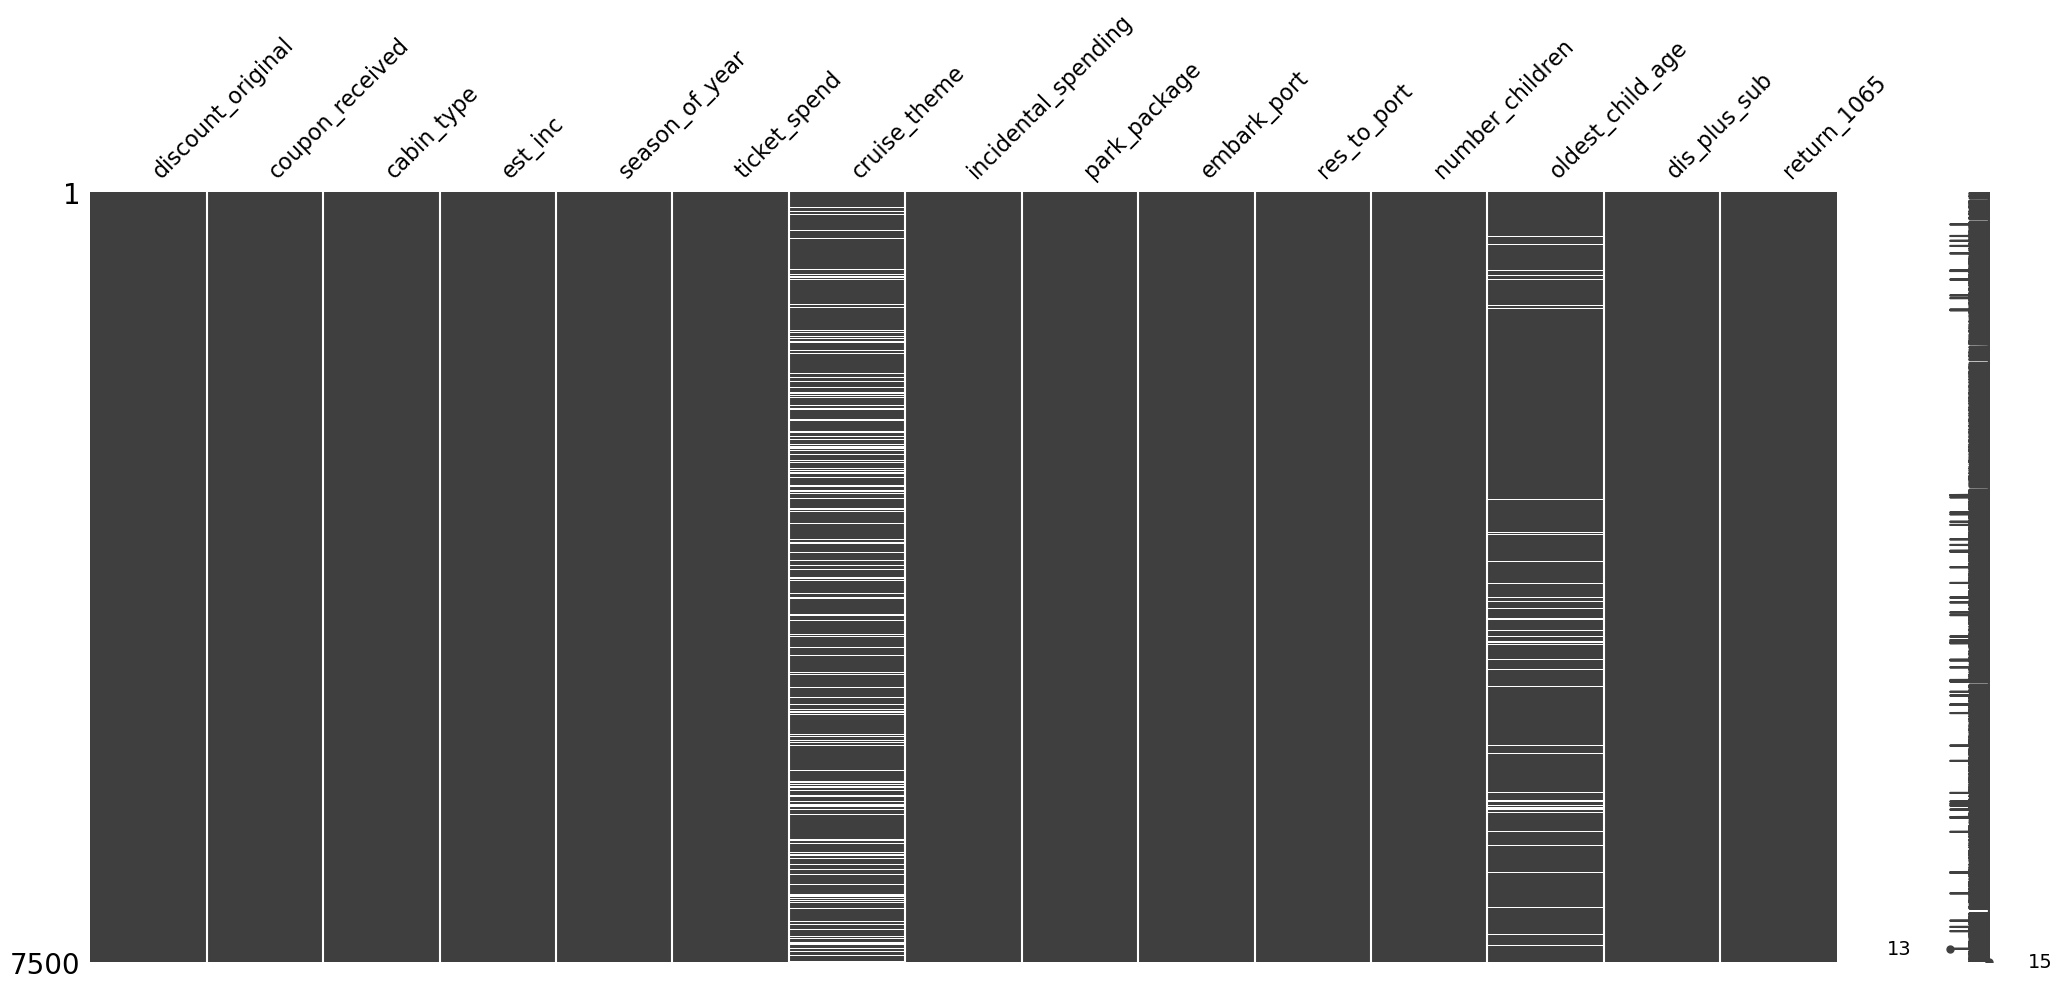

In [82]:
# Visualize missing values in dataframe with matrix heatmap
msno.matrix(df2)

<AxesSubplot:xlabel='return_1065', ylabel='count'>

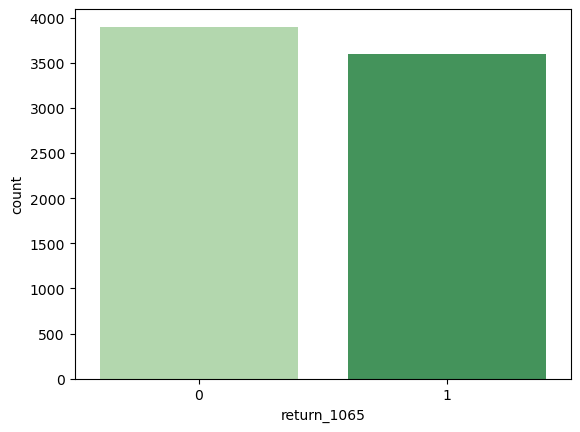

In [83]:
# Plot count distribution for target/outcome variable
# where 1' = household booked another cruise w/in 3 yrs
# & '0' = household did not return for another cruise w/in 3 yrs
sns.countplot(x='return_1065', data =df2, palette ='Greens')

<AxesSubplot:xlabel='return_1065', ylabel='count'>

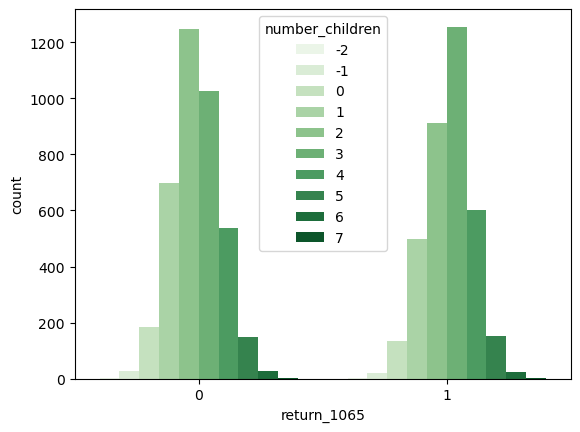

In [84]:
# Plot count distribution of outcome variable by number of children in household
sns.countplot(x='return_1065', data =df2, hue='number_children', 
              palette ='Greens')

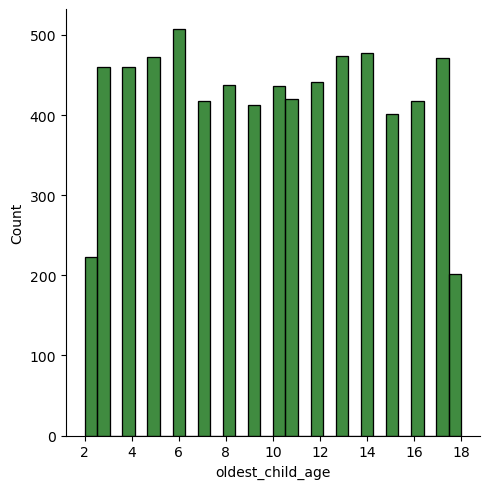

In [85]:
# Plot histogram of the oldest child's age
sns.displot(df2['oldest_child_age'].dropna(), kde=False, 
            color= 'darkgreen',bins = 30)

In [86]:
# Data Preprocessing - handle missing values & get dummy variables
# replace missing values with mean value
df2['oldest_child_age'] = df2['oldest_child_age'].fillna(
    df2['oldest_child_age'].mean())

# get unique non-null cruise themes
available_choices = df2['cruise_theme'].dropna().unique()

# replace missing values randomly from available theme choices
df2['cruise_theme'] = df2['cruise_theme'].apply(
    lambda x: random.choice(available_choices) if pd.isna(x) else x)

# get dummy variables for categorical variables
df3 = pd.get_dummies(df2,columns=['cabin_type','season_of_year',
                                  'cruise_theme','embark_port'])

<AxesSubplot:>

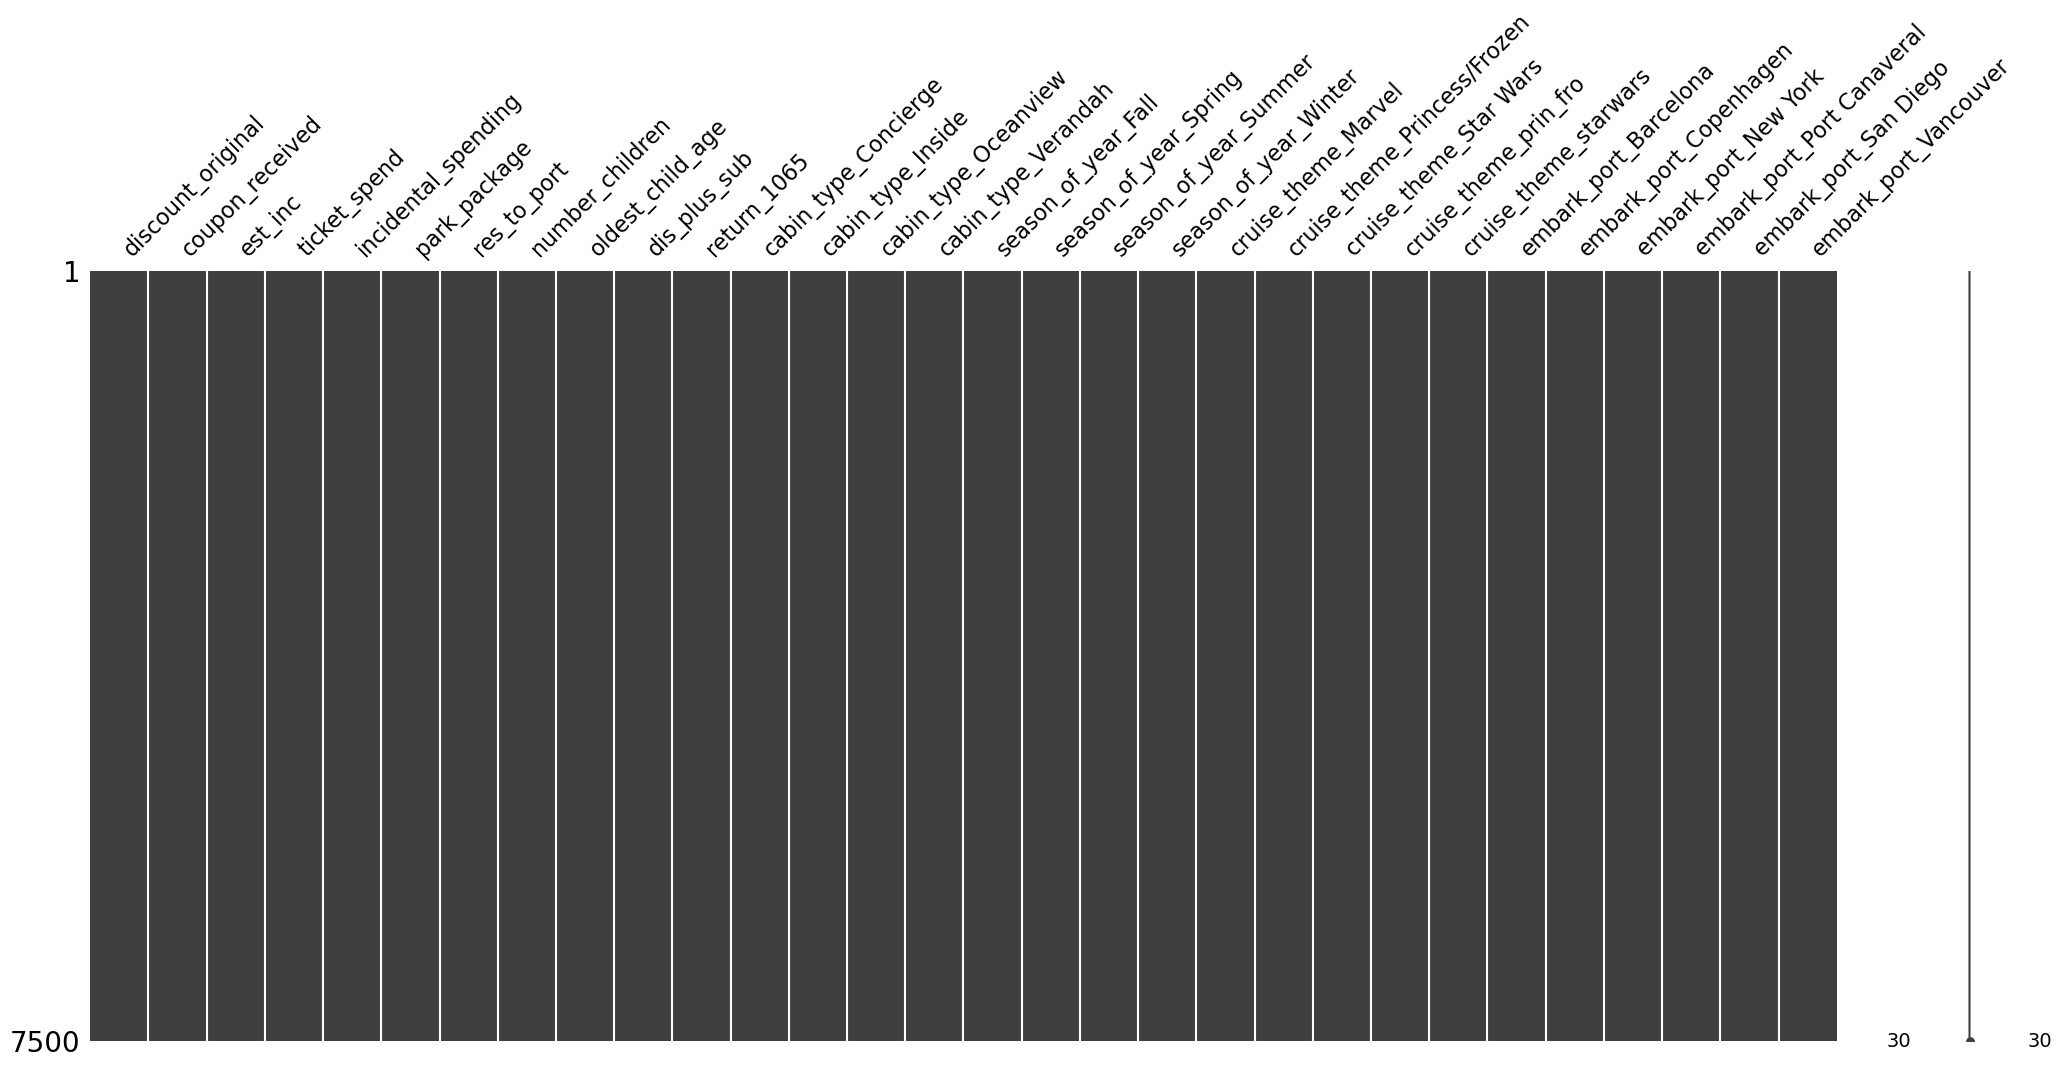

In [87]:
# Visualize missing values in preprocessed dataframe
msno.matrix(df3)

In [88]:
# Remove redundant columns
redundant_columns = ['cruise_theme_prin_fro', 'cruise_theme_starwars']
df3.drop(columns=redundant_columns, inplace=True)

In [89]:
# Separate input ('x') & outcome/target variable ('y')
x = df3.drop('return_1065', axis =1)
y = df3['return_1065']

In [90]:
# Split data into train & test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, test_size = 0.3,
                                                    random_state = 42)

In [91]:
# Logistic Regression model
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
log_predict = log_model.predict(x_test)
print("Logistic Regression Mean Squared Error:", mean_squared_error(y_test, log_predict))

Logistic Regression Mean Squared Error: 0.4631111111111111


In [92]:
# Random Forest model
rfc = RandomForestClassifier(n_estimators = 300, max_depth = 10, random_state = 42)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)

In [93]:
# Compute accuracy, precision, & recall for Random Forest model
accuracy = accuracy_score(y_test, rfc_pred)
precision = precision_score(y_test, rfc_pred)
recall = recall_score(y_test, rfc_pred)

In [94]:
print('Random Forest Accuracy:', accuracy)
print('Random Forest Precision:', precision)
print('Random Forest Recall:', recall)

Random Forest Accuracy: 0.648
Random Forest Precision: 0.656312625250501
Random Forest Recall: 0.5932971014492754


In [95]:
# Calculate F1 score for Random Forest model
f1 = f1_score(y_test, rfc_pred)
print('Random Forest F1 Score:',f1)

Random Forest F1 Score: 0.6232159847764035


In [96]:
# Create new row for prediction
new_row = {'discount_original': 0, 'coupon_received': 0, 'est_inc': 100000,
           'ticket_spend': 3109, 'incidental_spending': 1883.975, 'park_package': 1,
           'res_to_port': 350, 'number_children': 3, 'oldest_child_age': 10, 
           'dis_plus_sub': 0, 'cabin_type_Concierge': 0, 'cabin_type_Inside': 0,
           'cabin_type_Oceanview': 1, 'cabin_type_Verandah': 0, 'season_of_year_Fall': 0,
           'season_of_year_Spring': 0, 'season_of_year_Summer': 1, 'season_of_year_Winter': 0,
           'cruise_theme_Marvel': 1, 'cruise_theme_Princess/Frozen': 0, 
           'cruise_theme_Star Wars': 0, 'embark_port_Barcelona': 0, 'embark_port_Copenhagen': 0,
           'embark_port_New York': 0, 'embark_port_Port Canaveral': 0, 
           'embark_port_San Diego': 0, 'embark_port_Vancouver': 1}

new_row_df = pd.DataFrame([new_row])  # convert dictionary to dataframe

In [97]:
# Add new row to dataframe
df4 = pd.concat([df3, new_row_df], ignore_index = True)

In [98]:
# Preprocess new row of data
x_new = df4.drop('return_1065', axis=1) # drop outcome variable
x_new['oldest_child_age'] = x_new['oldest_child_age'].fillna(x_new['oldest_child_age'].mean()) # handle missing values
x_new_clean = x_new.dropna(axis=1) # drop other columns with missing values

In [99]:
# Predict cruise status for new row using trained models
log_predict_2 = log_model.predict(x_new_clean)
rfc_predict_2 = rfc.predict(x_new_clean)
print("Logistic Regression Predictions for New Rows:", log_predict_2)
print("Random Forest Predictions for New Rows:", rfc_predict_2)

Logistic Regression Predictions for New Rows: [0 0 0 ... 0 0 0]
Random Forest Predictions for New Rows: [0 0 0 ... 0 0 0]


In [100]:
# Get coefficients of the Logistic Regression model
log_coefs = pd.DataFrame(data = log_model.coef_.transpose(), index = x_train.columns, 
                              columns = ['Coefficient'])
print("Logistic Regression Coefficients:")
print(log_coefs)

Logistic Regression Coefficients:
                               Coefficient
discount_original            -3.133176e-05
coupon_received              -1.589110e-07
est_inc                       4.354163e-08
ticket_spend                  1.100786e-05
incidental_spending           5.716563e-06
park_package                 -3.778582e-05
res_to_port                  -2.813131e-03
number_children               5.915961e-05
oldest_child_age             -2.217220e-04
dis_plus_sub                  3.057572e-07
cabin_type_Concierge          2.525768e-06
cabin_type_Inside            -7.486047e-07
cabin_type_Oceanview         -1.102919e-06
cabin_type_Verandah          -4.056097e-07
season_of_year_Fall           1.405946e-07
season_of_year_Spring         3.232008e-06
season_of_year_Summer        -4.609848e-07
season_of_year_Winter        -2.642982e-06
cruise_theme_Marvel          -3.829165e-07
cruise_theme_Princess/Frozen  6.357515e-07
cruise_theme_Star Wars       -3.109252e-06
embark_port_Barcelon

Based on the new input of assigned variables, which represents a high-income family with 3 children, the oldest child being 10 years old, who embarked from the Vancouver port during the summer for a Marvel cruise theme, without any discount or coupon, the predictive model indicates that this particular household is unlikely to purchase tickets for a follow-up voyage. The estimated probability of this household returning for another cruise is approximately 43.1%.

To understand the factors influencing this prediction, an analysis of important features was conducted. The model highlighted several key factors that heavily influence the prediction outcome, including 'oldest child age', 'distance to port', 'estimated income', 'ticket spend', 'number of children', 'incidental spending', 'park package', and 'discount'. For example, focusing on the 'oldest child age', the model's predictions were compared for ages 10 and 15 while keeping other variables constant. The results indicated that households with older children were less likely to return for a follow-up voyage. This analysis can assist management in identifying households more prone to purchasing follow-up tickets based on these important features, facilitating targeted marketing and promotional strategies.

A detailed examination of the coefficients was performed to understand how individual features impact the model's predictions. Positive coefficients positively affect the probability of return, while negative coefficients have a negative impact. The magnitude of the coefficient signifies the extent of the impact. Notably, the feature with the greatest negative impact was 'distance to port', suggesting that reducing travel distance or providing convenient transportation options could increase the likelihood of visitors purchasing follow-up tickets. 'Discount' emerged as another significant factor negatively influencing return probability. Consequently, offering more attractive discount promotions could encourage visitors to return. Conversely, 'number of children' exhibited the highest positive coefficient, indicating that households with more children are more inclined to revisit. Overall, the insights derived from the coefficient analysis can guide the company's strategic decisions to enhance certain features and tailor services to maximize business profitability.

In conclusion, the predictive model constructed using classification methods offers valuable insights for Disney's cruise business. By examining important features and coefficient impacts, the company gains a comprehensive understanding of the factors that drive return probabilities. This information can be leveraged to optimize marketing approaches, refine service offerings, and focus on key aspects such as reducing travel barriers and strategically employing discounts. Through such data-driven decision-making, Disney can enhance its ability to predict customer behavior and tailor its strategies to boost customer engagement and revenue in the cruise segment.

## **A/B Testing**

In [101]:
popcorn_df = pd.read_csv('popcorn_buckets.csv') # load data
popcorn_df.head()  # view first few rows

,location,bucket,Q1_sales_USD
0,Disneyland Paris,Cinderella,139413.1
1,Disneyland Paris,Star_Wars,138890.4
2,Disneyland Paris,Mermaid,117696.4
3,Disneyland Paris,MickeySuit,176821.9
4,Disneyland Paris,MickeyEars,168442.1


In [102]:
# Get unique types of popcorn buckets
buckets = popcorn_df['bucket'].unique()
print(buckets)

['Cinderella' 'Star_Wars' 'Mermaid' 'MickeySuit' 'MickeyEars' 'RedWhite']


In [103]:
# Compare sales of different buckets using t-tests
for i in range(len(buckets)):
    for j in range(i+1, len(buckets)):
        bucket1 = buckets[i]
        bucket2 = buckets[j]
        data1 = popcorn_df[popcorn_df['bucket'] == bucket1]['Q1_sales_USD']
        data2 = popcorn_df[popcorn_df['bucket'] == bucket2]['Q1_sales_USD']
        stat, pval = ttest_ind(data1, data2)
        if pval < 0.05:
            print(f'{bucket1} vs. {bucket2}: p-value={pval:.3f} (significant)')
        else:
            print(f'{bucket1} vs. {bucket2}: p-value={pval:.3f} (not significant)')

Cinderella vs. Star_Wars: p-value=0.574 (not significant)
Cinderella vs. Mermaid: p-value=0.018 (significant)
Cinderella vs. MickeySuit: p-value=0.000 (significant)
Cinderella vs. MickeyEars: p-value=0.010 (significant)
Cinderella vs. RedWhite: p-value=0.000 (significant)
Star_Wars vs. Mermaid: p-value=0.017 (significant)
Star_Wars vs. MickeySuit: p-value=0.001 (significant)
Star_Wars vs. MickeyEars: p-value=0.049 (significant)
Star_Wars vs. RedWhite: p-value=0.000 (significant)
Mermaid vs. MickeySuit: p-value=0.000 (significant)
Mermaid vs. MickeyEars: p-value=0.000 (significant)
Mermaid vs. RedWhite: p-value=0.000 (significant)
MickeySuit vs. MickeyEars: p-value=0.063 (not significant)
MickeySuit vs. RedWhite: p-value=0.000 (significant)
MickeyEars vs. RedWhite: p-value=0.000 (significant)


In [104]:
# Get unique theme park names ('location')
locations = popcorn_df['location'].unique()
print(locations)

['Disneyland Paris' 'Disneyland Resort' 'Hong Kong Disneyland Resort'
 'Shanghai Disney Resort' 'Tokyo Disney Resort' 'Walt Disney World Resort']


In [105]:
# Compare sales of different locations using t-tests
for i in range(len(locations)):
    for j in range(i+1, len(locations)):
        location1 = locations[i]
        location2 = locations[j]
        data3= popcorn_df[popcorn_df['location'] == location1]['Q1_sales_USD']
        data4= popcorn_df[popcorn_df['location'] == location2]['Q1_sales_USD']
        stat, pval = ttest_ind(data3, data4)
        if pval < 0.05:
            print(f'{location1} vs. {location2}: p-value={pval:.3f} (significant)')
        else:
            print(f'{location1} vs. {location2}: p-value={pval:.3f} (not significant)')

Disneyland Paris vs. Disneyland Resort: p-value=0.772 (not significant)
Disneyland Paris vs. Hong Kong Disneyland Resort: p-value=0.975 (not significant)
Disneyland Paris vs. Shanghai Disney Resort: p-value=0.784 (not significant)
Disneyland Paris vs. Tokyo Disney Resort: p-value=0.891 (not significant)
Disneyland Paris vs. Walt Disney World Resort: p-value=0.754 (not significant)
Disneyland Resort vs. Hong Kong Disneyland Resort: p-value=0.728 (not significant)
Disneyland Resort vs. Shanghai Disney Resort: p-value=0.920 (not significant)
Disneyland Resort vs. Tokyo Disney Resort: p-value=0.849 (not significant)
Disneyland Resort vs. Walt Disney World Resort: p-value=0.996 (not significant)
Hong Kong Disneyland Resort vs. Shanghai Disney Resort: p-value=0.713 (not significant)
Hong Kong Disneyland Resort vs. Tokyo Disney Resort: p-value=0.848 (not significant)
Hong Kong Disneyland Resort vs. Walt Disney World Resort: p-value=0.700 (not significant)
Shanghai Disney Resort vs. Tokyo Disn

We conducted A/B Testing to compare the recent sales performance of different Disney popcorn bucket options. Our objective was to determine which popcorn bucket matchups exhibit statistically significant differences in performance. To achieve this, we followed a structured process. Initially, we loaded the sales data from the 'popcorn_buckets.csv' file and examined its contents. We then isolated unique types of popcorn buckets and distinct theme park locations. For each pair of popcorn bucket types, we employed t-tests to calculate p-values based on the difference in means of their sales figures. The null hypothesis assumed that the mean difference was zero, while the alternative hypothesis suggested a non-zero mean difference. If the resulting p-value was less than 0.05 (our chosen significance level), we considered the comparison to be statistically significant, indicating a meaningful difference in sales performance. Conversely, if the p-value was greater than or equal to 0.05, we concluded that there was no significant difference in sales between the two buckets. Applying this approach, we found that the Cinderella and Star_Wars buckets, as well as the MickeySuit and MickeyEars buckets, did not exhibit significant differences in sales performance, as their respective p-values were both above 0.05. However, for all other bucket pairs, the p-values were below 0.05, suggesting meaningful discrepancies in their sales figures. Additionally, when extending the analysis to different theme park locations, we observed that all location comparisons resulted in p-values greater than 0.05, implying that the various locations did not significantly differ in terms of sales performance. Based on these findings, we recommend focusing on promoting the buckets with significant differences in sales and considering the discontinuation of the Cinderella, Star_Wars, MickeySuit, and MickeyEars buckets due to their statistically non-significant variations in performance.

## **Conclusions**

In conclusion, the comprehensive marketing analytics study conducted on Disney's operations offers valuable insights and recommendations across various facets of the business. From data visualization, which highlights trends in film production and genre preferences, to segmentation and targeting strategies for different customer clusters, and from conjoint analysis to suggest amenities for a new hotel in Hawaii, to a strategic analysis memo outlining the importance of technological upgrades in theme parks, and finally, from forecasting net income trends to A/B testing results for popcorn bucket sales, each section of this project contributes to Disney's data-driven decision-making process.

These insights are not just descriptive but offer actionable recommendations. For instance, the adoption of RFID-enabled Magic Bands in theme parks can revolutionize guest experiences and operational efficiency. Targeted marketing strategies based on customer clusters can help boost revenue, and understanding the factors influencing return probabilities aids in customer retention efforts. Moreover, the conjoint analysis provides a data-driven approach to optimizing amenity packages for Disney's new hotel in Hawaii, and the A/B testing results can guide promotional efforts for popcorn buckets.

In today's dynamic market, data-driven insights are essential for making informed strategic decisions. This project demonstrates the power of data analytics in shaping Disney's future strategies and ensuring its continued success in the entertainment and leisure industry. By embracing data-driven decision-making, Disney can stay at the forefront of innovation, meet the evolving preferences of its customers, and maintain its position as a global entertainment leader.